importing the depencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [2]:
#data loading
df=pd.read_csv('/content/train.csv')

In [3]:
df.shape


(800, 22)

In [4]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [6]:
#display all columns of a dataframe
pd.set_option('display.max_columns',None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
#convert age column datatype to integer
df["age"]=df["age"].astype(int)

In [9]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [10]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(f"{col} : {df[col].unique()}")
    print("-"*50)

A1_Score : [1 0]
--------------------------------------------------
A2_Score : [0 1]
--------------------------------------------------
A3_Score : [1 0]
--------------------------------------------------
A4_Score : [0 1]
--------------------------------------------------
A5_Score : [1 0]
--------------------------------------------------
A6_Score : [0 1]
--------------------------------------------------
A7_Score : [1 0]
--------------------------------------------------
A8_Score : [0 1]
--------------------------------------------------
A9_Score : [1 0]
--------------------------------------------------
A10_Score : [1 0]
--------------------------------------------------
gender : ['f' 'm']
--------------------------------------------------
ethnicity : ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice : ['no' 'yes']
-------------------------------

In [11]:
#dropping id& age_desc

In [12]:
df.drop(columns=["ID","age_desc"],inplace=True)

In [13]:
df.shape

(800, 20)

In [14]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [15]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [16]:
#define the mapping dictionary for country names
country_mapping={
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong":"China"}


#replace value in the country column
df["contry_of_res"]=df["contry_of_res"].replace(country_mapping)

In [17]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [18]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [19]:
#target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


insights
1.messing values
2. age-ds has only 1 value so c mieux de la supprimer
3. fixation des noms des pays
4. indentified calss imblance in the target column



In [20]:
df.shape


(800, 20)

In [21]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [22]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**univariate analysis**
numerical columns :
result

age

In [23]:
#set the disered theme
sns.set_theme(style="darkgrid")

mean : 27.96375
median : 24.0


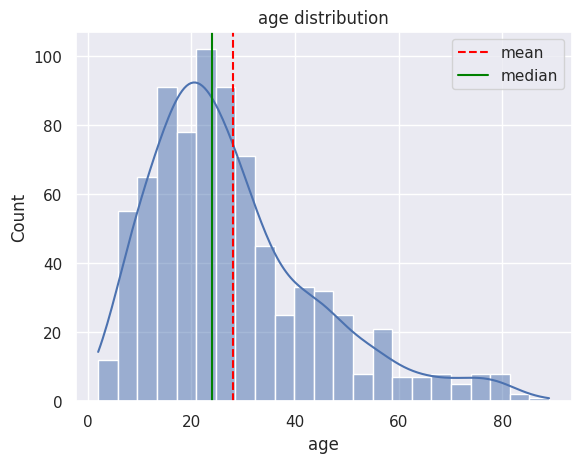

In [24]:
#histogram for age

sns.histplot(df["age"],kde=True)
plt.title("age distribution")

#calcul mean and median
mean=df["age"].mean()
median=df["age"].median()

print(f"mean : {mean}")
print(f"median : {median}")

#add mean and median to the plot
plt.axvline(mean,color="red",linestyle="--",label="mean")
plt.axvline(median,color="green",linestyle="-",label="median")
plt.legend()
plt.show()

mean : 8.537303106501248
median : 9.605299308


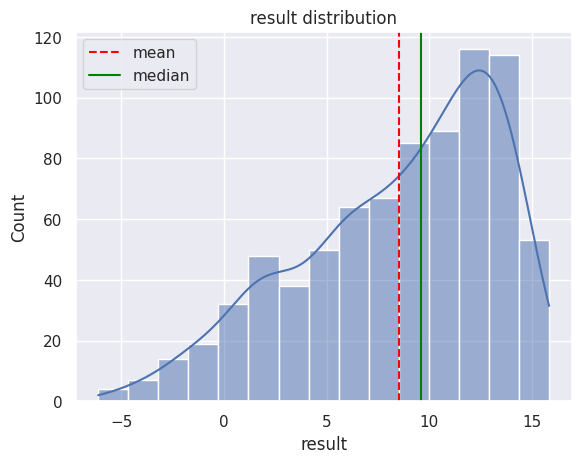

In [25]:
#historgam for result
sns.histplot(df["result"],kde=True)
plt.title("result distribution")

#calcul mean and median
mean=df["result"].mean()
median=df["result"].median()

print(f"mean : {mean}")
print(f"median : {median}")

#add mean and median to the plot
plt.axvline(mean,color="red",linestyle="--",label="mean")
plt.axvline(median,color="green",linestyle="-",label="median")
plt.legend()
plt.show()


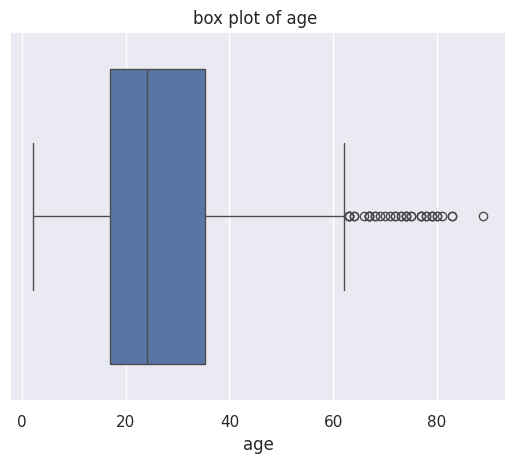

In [26]:
#box plot
sns.boxplot(x=df["age"])
plt.title("box plot of age ")
plt.show()

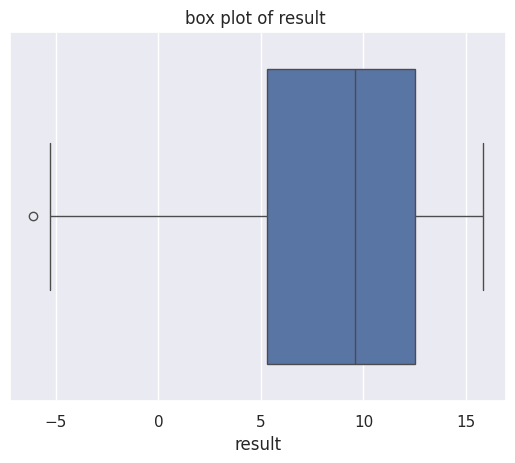

In [27]:
#box plot
sns.boxplot(x=df["result"])
plt.title("box plot of result ")
plt.show()

In [28]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [29]:
len(age_outliers)

39

In [30]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [31]:
len(result_outliers)

1

univariate analysis for categorical
 columns

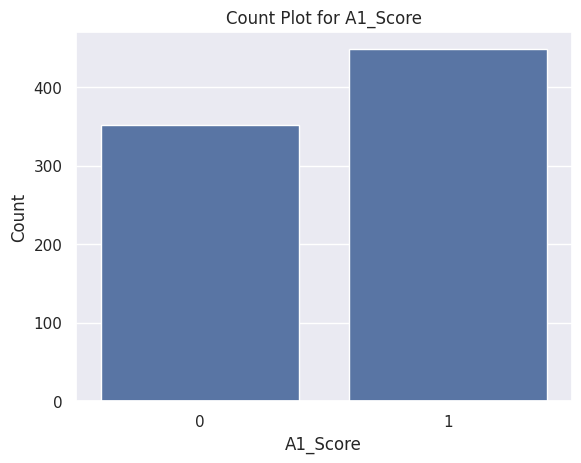

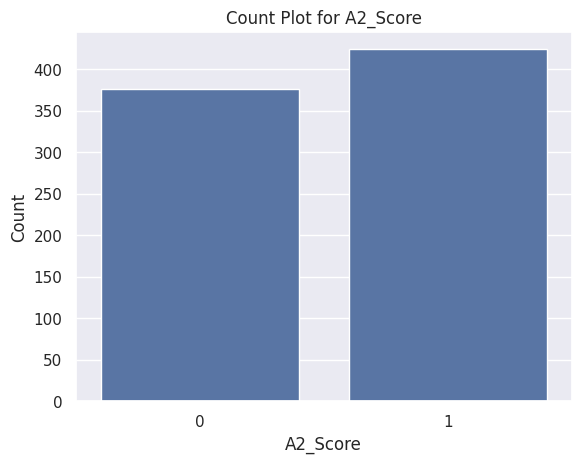

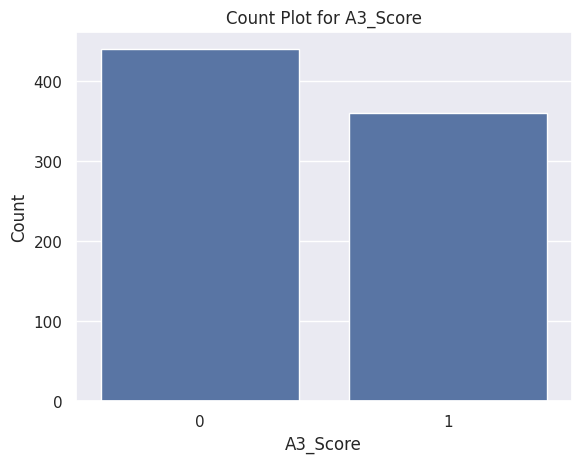

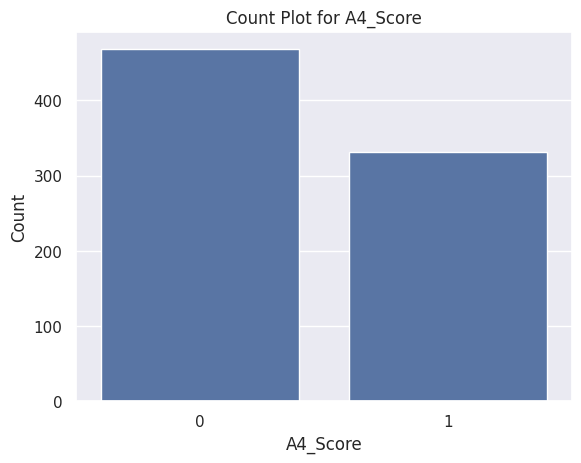

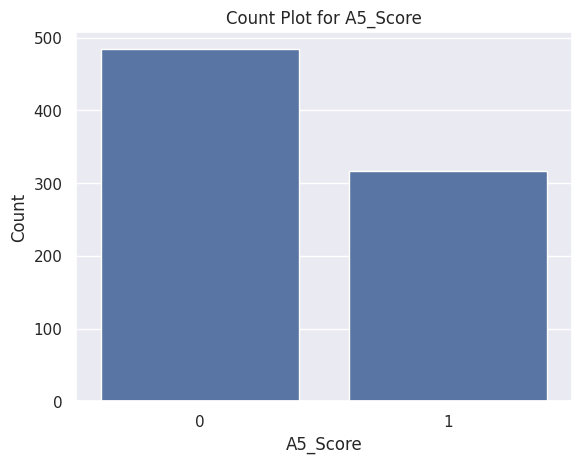

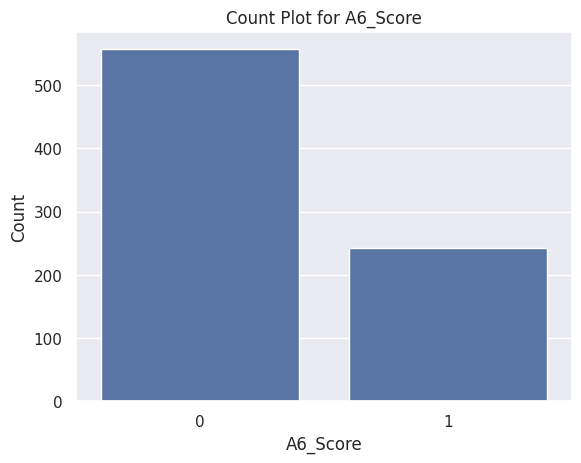

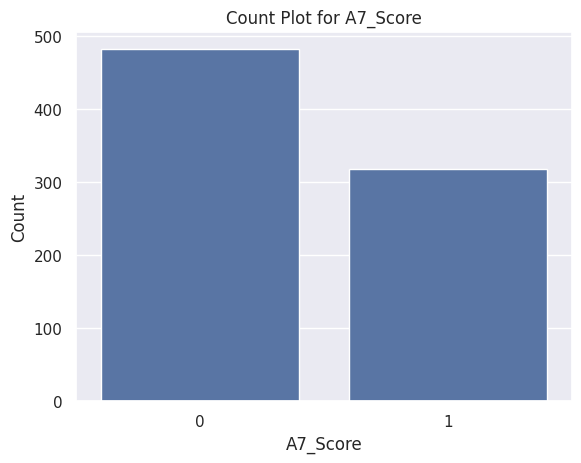

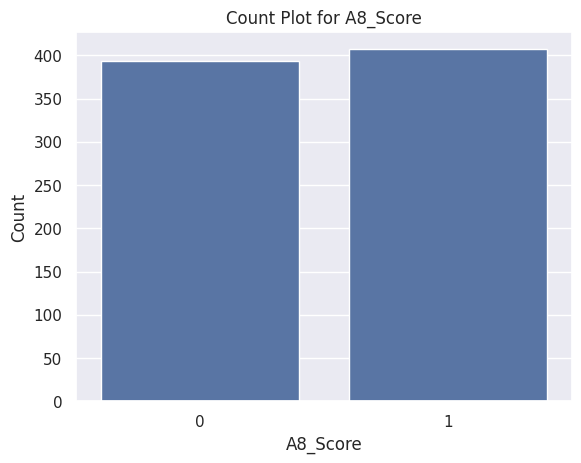

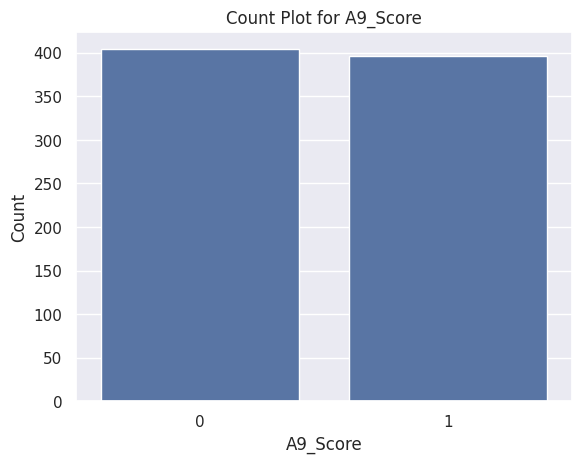

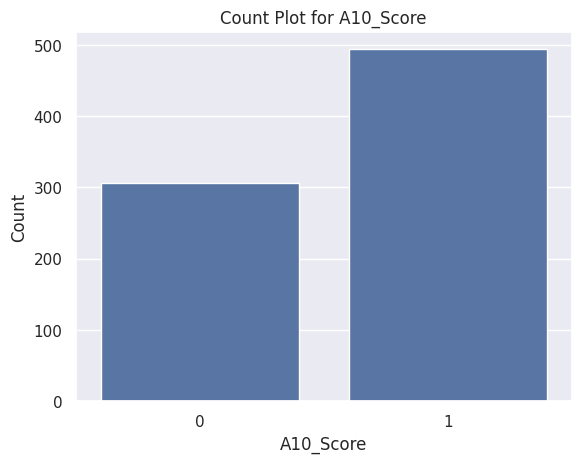

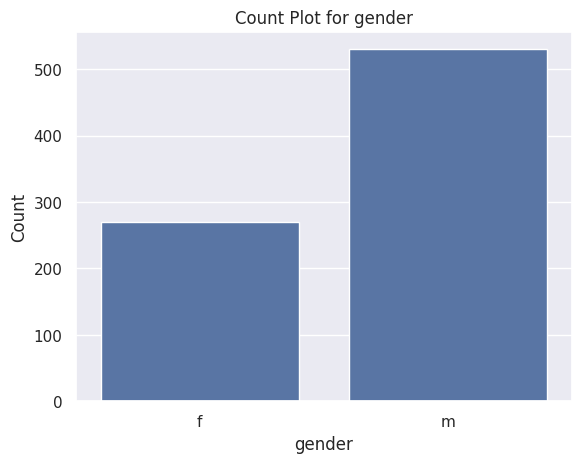

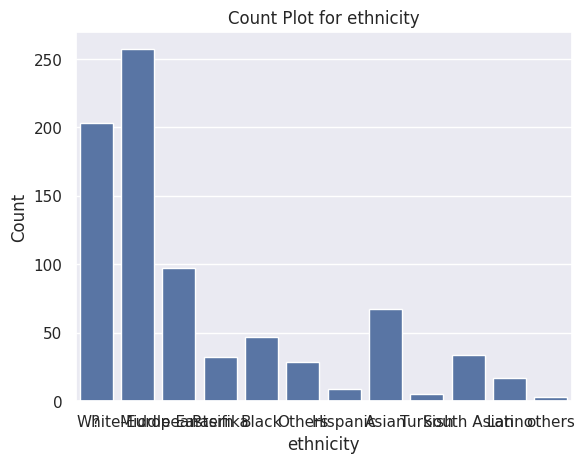

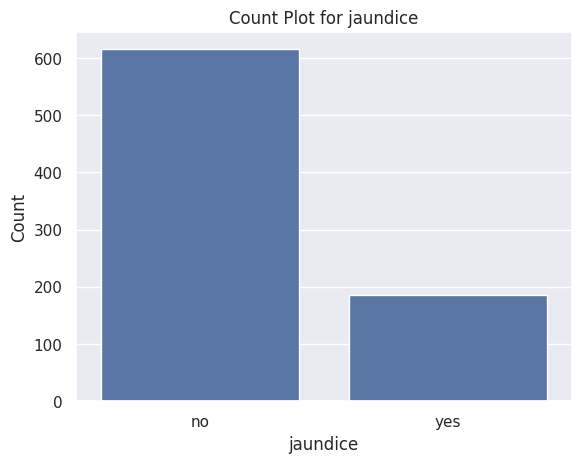

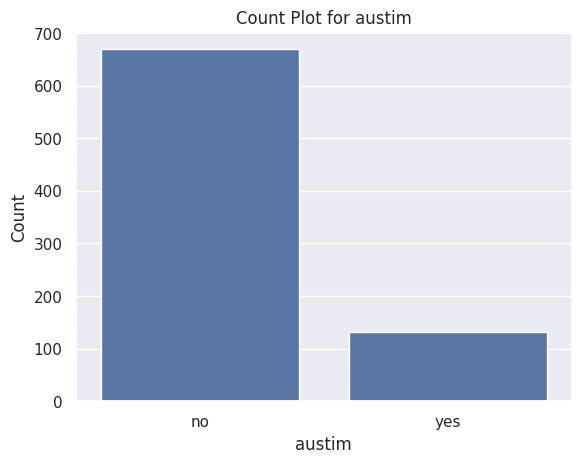

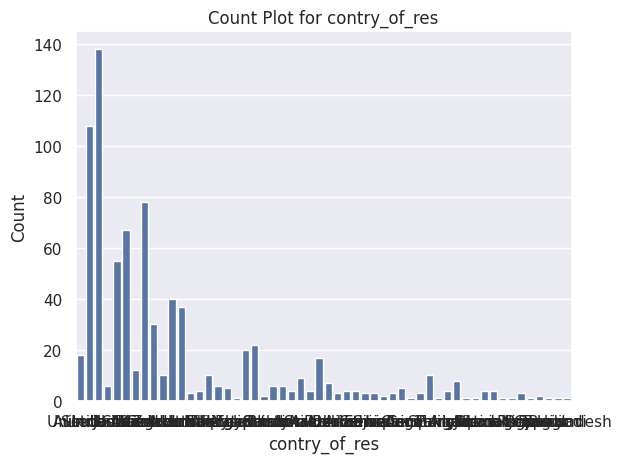

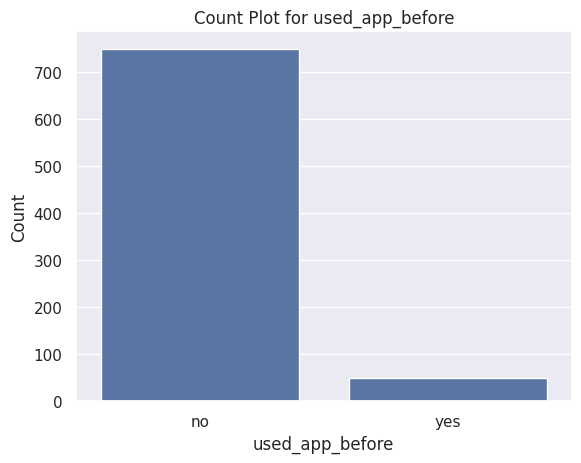

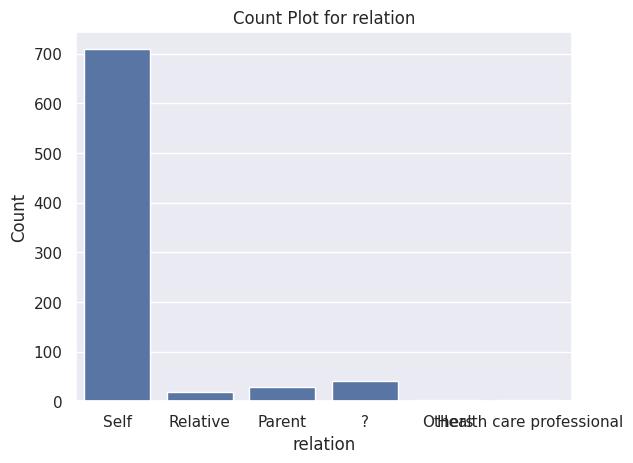

In [32]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [33]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [34]:
df['ethnicity']=df['ethnicity'].replace({'?':'Others','Others':'others'})

In [35]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [36]:
df['relation']=df['relation'].replace({
    '?':'Others',
    'Relative':'Others',
    'Parent':'Others',
    'Health care professional':'Others'



})

In [37]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

Label Encoding

In [38]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [39]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [40]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [41]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [42]:
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


Bivariate Analysis

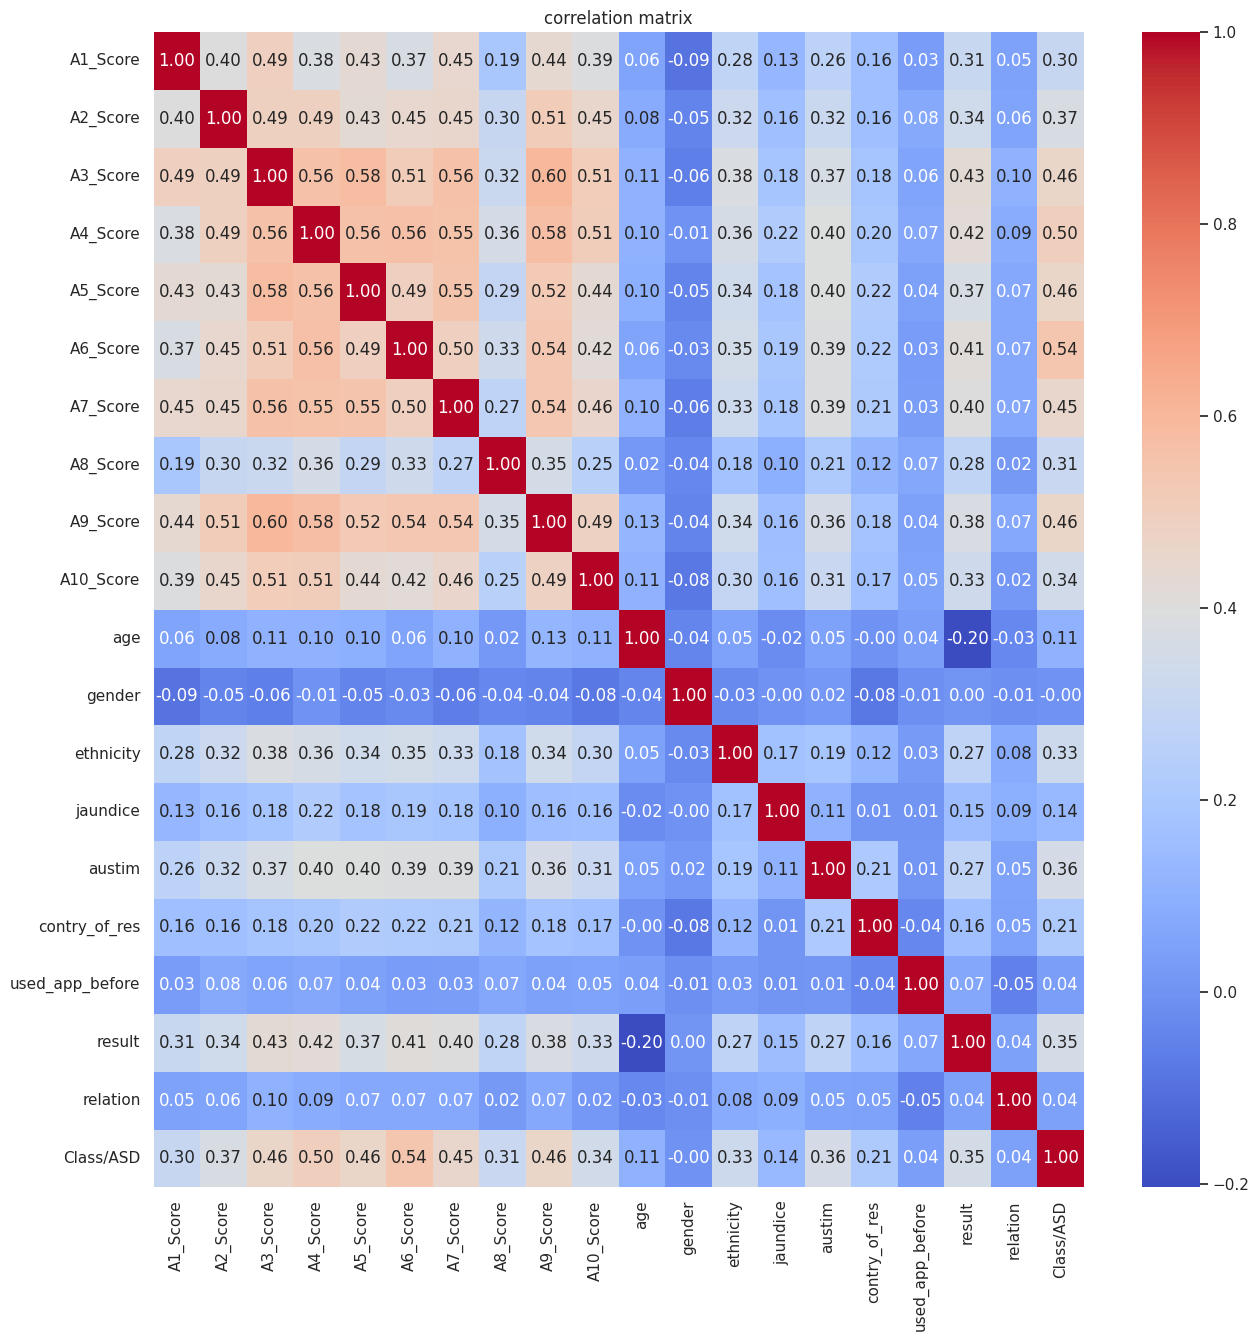

In [43]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm", fmt=".2f")
plt.title("correlation matrix")
plt.show()


insights fron EDA :
-there a few outliers in numerical(age.result)
-There is a class imbalance in the target column
-There is a class imbalance in the categorical features
-We don't have any highly correlated column
-performed label encoding and saved the encoders

 ** Data preprocessing**

In [44]:
#handle teh outliers
#function to replace the outliers with median


def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [45]:
#replace outliers in the age column
df=replace_outliers_with_median(df,"age")

#replace outliers int the result column
df=replace_outliers_with_median(df,"result")

In [46]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


train test split


In [47]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [48]:
x=df.drop(columns=["Class/ASD"])
y=df["Class/ASD"]

In [49]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [50]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#

In [52]:
print(X_train.shape)
print(X_test.shape)


(640, 19)
(160, 19)


**SMOTE (Synthetic Minority Over-sampling Technique) est une technique très importante pour traiter les jeux de données déséquilibrés en machine learning**

In [55]:
SMOTE=SMOTE(random_state=42)

In [56]:
X_train_smote,y_train_smote=SMOTE.fit_resample(X_train,y_train)

In [59]:

print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


***model training***

In [60]:
#dictionnary of classifiers
models={
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [61]:
print(models)

{'RandomForestClassifier': RandomForestClassifier(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}


In [63]:
#dictionnary to store the cross validation results
cv_scores=[]

#perform 5-fold cross validation for each model
for model_name,model in models.items():
  cv_score=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores.append(cv_score)
  print(f"{model_name} : {np.mean(cv_score):.2f}")





RandomForestClassifier : 0.91
DecisionTreeClassifier : 0.85
XGBClassifier : 0.90


In [64]:
cv_scores

[array([0.89805825, 0.92718447, 0.91262136, 0.91747573, 0.90776699]),
 array([0.77669903, 0.87378641, 0.87378641, 0.87378641, 0.84951456]),
 array([0.86407767, 0.9223301 , 0.90291262, 0.90776699, 0.91262136])]

**model selection and hyperparameter**

In [65]:
#initializing models
rf_model=RandomForestClassifier()
dt_model=DecisionTreeClassifier()
xgb_model=XGBClassifier()

In [66]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [70]:
# hyperparameter tunig for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model and fit to the training data
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42) # Changed decision_tree to dt_model
random_search_dt.fit(X_train_smote, y_train_smote)  # Fit the RandomizedSearchCV object

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42) # Changed random_forest to rf_model
random_search_rf.fit(X_train_smote, y_train_smote)  # Fit the RandomizedSearchCV object

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42) # Changed xgboost_classifier to xgb_model
random_search_xgb.fit(X_train_smote, y_train_smote)  # Fit the RandomizedSearchCV object

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [71]:
#get model with best score
best_model=None
best_score=0
if random_search_dt.best_score_>best_score:
  best_score=random_search_dt.best_score_
  best_model=random_search_dt.best_estimator_

if random_search_rf.best_score_>best_score:
  best_score=random_search_rf.best_score_
  best_model=random_search_rf.best_estimator_

if random_search_xgb.best_score_>best_score:
  best_score=random_search_xgb.best_score_
  best_model=random_search_xgb.best_estimator_


In [73]:
print(f"best_model:{best_model}")
print(f"best_score:{best_score}")

best_model:RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200)
best_score:0.9262135922330097


In [74]:
#save the model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

**evaluation**

In [77]:
#evaluate the test data
y_pred=best_model.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.83125
confusion matrix:
 [[109  15]
 [ 12  24]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       124
           1       0.62      0.67      0.64        36

    accuracy                           0.83       160
   macro avg       0.76      0.77      0.76       160
weighted avg       0.84      0.83      0.83       160

